In [1]:
import re, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in","xtick.top":True,"ytick.right":True,"axes.grid":True})
%matplotlib inline

def read_file(filename):
    lines = []
    with open (filename, "r") as myfile:
        lines = [line.rstrip('\n') for line in myfile]
    return lines

def calcul_fair(values):
    '''
    @brief:
        calculate fairness
    @params:
        values: a list of values
    '''
    values = np.array(values)
    n = len(values)
    if sum(values) != 0.:
        return pow(sum(values), 2)/(n*sum(pow(values, 2)))
    else:
        return 1.

# Unit Test

In [2]:
# unit test

n_as = 2
method = 'sed'
rate = 1.00
ep = 0
dirname = os.path.join("../data/simulation", "first-impression-dump-all","1lb-2as-1worker-1stage-exp-0.20cpumu", method, "rate{:.3f}".format(rate), "")
filename = os.path.join(dirname, 'test.log'.format(ep))

In [3]:
!ls $filename

../data/simulation/first-impression-dump-all/1lb-2as-1worker-1stage-exp-0.20cpumu/sed/rate1.000/test.log


In [4]:
lines = [l for l in read_file(filename) if 'Periodic' in l]

In [5]:
fair_list = []
ratio_lo, ratio_hi = 0.01, 0.99
for l in lines[int(ratio_lo*len(lines)):int(ratio_hi*len(lines))]:
    t_rest_list = [float(s.split(' ')[-1]) for s in l.split('|')]
    fair_list.append(calcul_fair(t_rest_list))

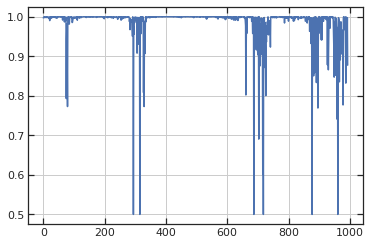

In [7]:
plt.plot(fair_list)

# Run all

In [53]:
rates = [0.645, 0.765, 0.845, 0.925, 1.]
methods = ["srt", "sed","lsq","wcmp","ecmp"]
ratio_lo, ratio_hi = 0.05, 0.95

result = {}

for rate in rates:
    result[rate] = {}
    for method in methods:
        dirname = os.path.join("../data/simulation", "first-impression-dump-all","1lb-2as-1worker-1stage-exp-0.20cpumu", method, "rate{:.3f}".format(rate), "")
        filename = os.path.join(dirname, 'test.log'.format(ep))
        
        all_lines = [l for l in read_file(filename)]
        start_idx = [i for i, l in enumerate(all_lines) if 'no flow registered' in l]
        end_idx = [i for i, l in enumerate(all_lines) if '--------------------' in l]
        assert len(start_idx) == len(end_idx)
        n_ep = len(start_idx)
        fair_list = []
        for ep in range(1):
            lines = [l for l in all_lines[int(ratio_lo*start_idx[ep]):int(ratio_hi*end_idx[ep])] if 'Periodic' in l]
            for l in lines:
                t_rest_list = [float(s.split(' ')[-1]) for s in l.split('|')]
                fair_list.append(calcul_fair(t_rest_list))
                
        result[rate][method] = fair_list

In [54]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

rate=0.645 | method=srt | Fairness Index 0.877
rate=0.645 | method=sed | Fairness Index 0.818
rate=0.645 | method=lsq | Fairness Index 0.792
rate=0.645 | method=wcmp | Fairness Index 0.751
rate=0.645 | method=ecmp | Fairness Index 0.578


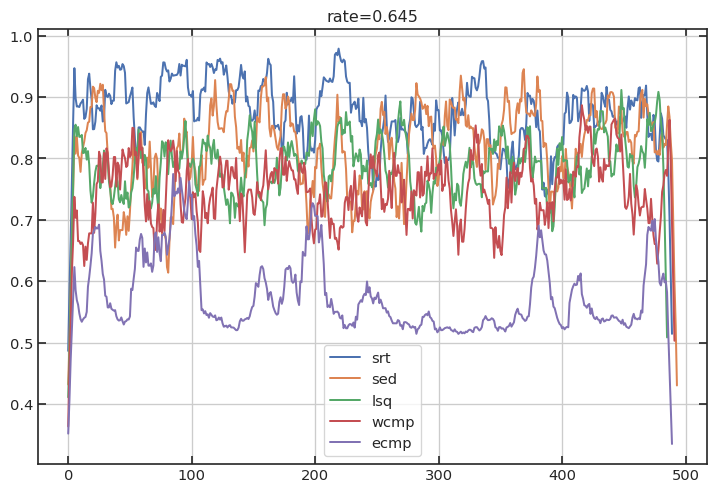

rate=0.765 | method=srt | Fairness Index 0.924
rate=0.765 | method=sed | Fairness Index 0.865
rate=0.765 | method=lsq | Fairness Index 0.797
rate=0.765 | method=wcmp | Fairness Index 0.765
rate=0.765 | method=ecmp | Fairness Index 0.513


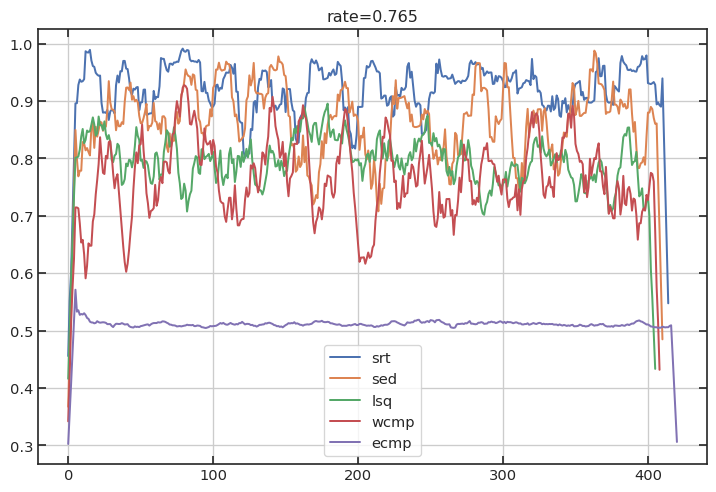

rate=0.845 | method=srt | Fairness Index 0.947
rate=0.845 | method=sed | Fairness Index 0.917
rate=0.845 | method=lsq | Fairness Index 0.792
rate=0.845 | method=wcmp | Fairness Index 0.757
rate=0.845 | method=ecmp | Fairness Index 0.518


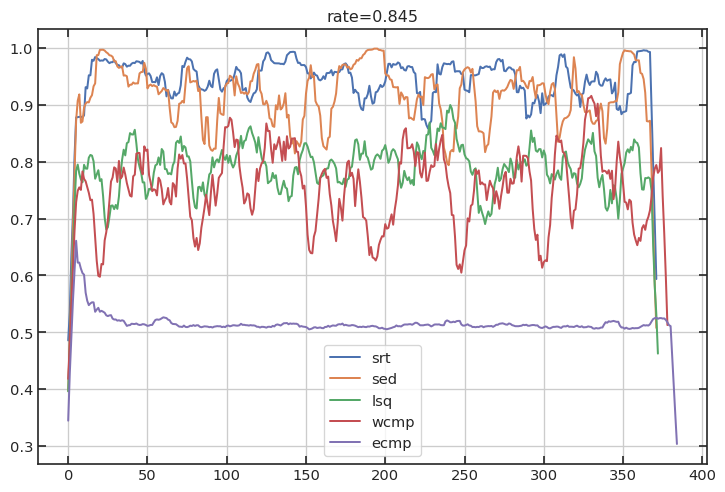

rate=0.925 | method=srt | Fairness Index 0.964
rate=0.925 | method=sed | Fairness Index 0.956
rate=0.925 | method=lsq | Fairness Index 0.806
rate=0.925 | method=wcmp | Fairness Index 0.800
rate=0.925 | method=ecmp | Fairness Index 0.519


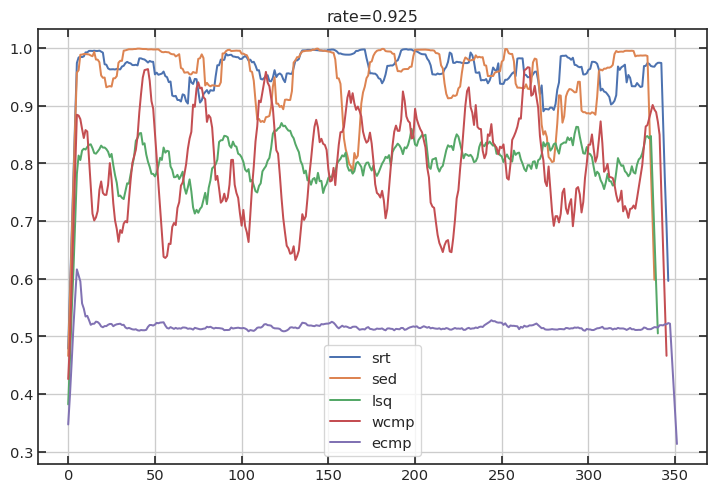

rate=1.000 | method=srt | Fairness Index 0.999
rate=1.000 | method=sed | Fairness Index 0.992
rate=1.000 | method=lsq | Fairness Index 0.858
rate=1.000 | method=wcmp | Fairness Index 0.784
rate=1.000 | method=ecmp | Fairness Index 0.524


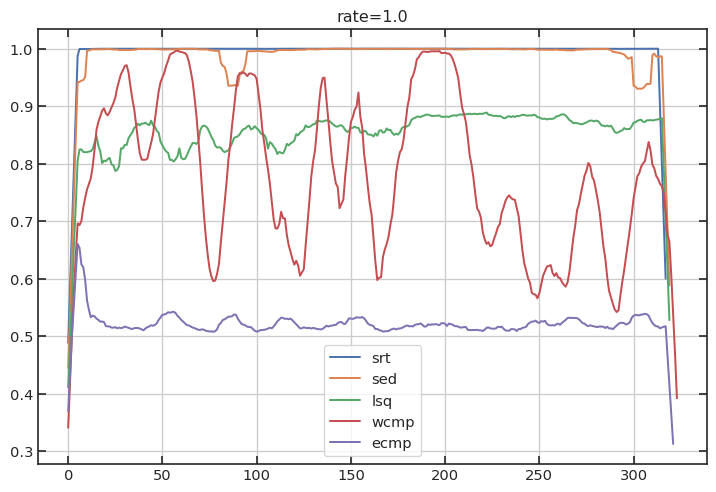

In [55]:
for rate, tuples in result.items():
    fig = plt.figure(figsize=(9, 6), dpi=96)
    for method, values in tuples.items():
        plt.plot(smooth(values, 10), label=method)
        print('rate={:.3f} | method={} | Fairness Index {:.3f}'.format(rate, method, np.mean(values)))
    plt.legend()
    plt.title('rate={}'.format(rate))
    plt.show()

# Plot for 100% utilization

In [2]:
COLORS = ["#3978af", 
          "#559d3f",
          "#d1342b",
          "#ef8532", 
          "#634295", 
          "#a65d34", 
          "#aecde1", 
          "#b4dc93",
          "#ee9e9b", 
          "#f4c07b", 
          "#c6b4d3",
          "#fffea6",
          "#df3583"]

In [57]:
lines = [l.split(':')[-1] for l in read_file(filename) if 'Actual On Flow' in l]

In [58]:
[int(i) for i in lines[0].split('|')]

[0, 0]

In [59]:
rate = 1

In [60]:
t_rest_list

[0.087318, 6.175435]

In [61]:
result = {}
result_grp1 = {}
result_grp2 = {}

for method in methods:
    dirname = os.path.join("../data/simulation", "first-impression-dump-all","1lb-2as-1worker-1stage-exp-0.20cpumu", method, "rate{:.3f}".format(rate), "")
    filename = os.path.join(dirname, 'test.log'.format(ep))

    all_lines = [l for l in read_file(filename)]
    start_idx = [i for i, l in enumerate(all_lines) if 'no flow registered' in l]
    end_idx = [i for i, l in enumerate(all_lines) if '--------------------' in l]
    assert len(start_idx) == len(end_idx)
    n_ep = len(start_idx)
    t_rest_grp1_list = []
    t_rest_grp2_list = []
    for ep in range(1):
        lines = [l for l in all_lines[int(ratio_lo*start_idx[ep]):int(ratio_hi*end_idx[ep])] if 'Periodic' in l]
        for l in lines[int(ratio_lo*len(lines)):int(ratio_hi*len(lines))]:
            t_rest_list = [float(s.split(' ')[-1]) for s in l.split('|')]
            t_rest_grp1_list.append(t_rest_list[0])
            t_rest_grp2_list.append(t_rest_list[1])

    result_grp1[method] = t_rest_grp1_list
    result_grp2[method] = t_rest_grp2_list

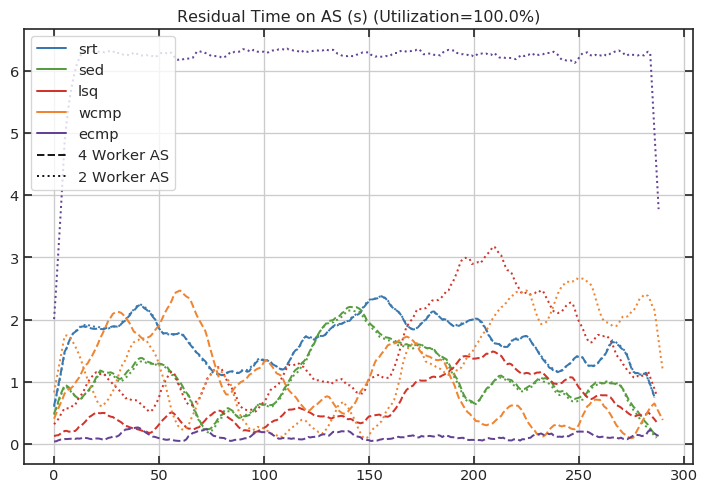

In [62]:
fig = plt.figure(figsize=(9, 6), dpi=96)
for i, method in enumerate(methods):
    plt.plot(smooth(result_grp1[method], 10), color=COLORS[i], linestyle='--')
    plt.plot(smooth(result_grp2[method], 10), color=COLORS[i], linestyle=':')
    plt.plot(0,0, color=COLORS[i], label=method)
plt.plot(0, 0, color='k', linestyle='--', label='4 Worker AS')
plt.plot(0, 0, color='k', linestyle=':', label='2 Worker AS')
plt.legend()
plt.title('Residual Time on AS (s) (Utilization={:.1%})'.format(rate))
plt.show()

In [63]:
result = {}
result_grp1 = {}
result_grp2 = {}

for method in methods:
    dirname = os.path.join("../data/simulation", "first-impression-dump-all","1lb-2as-1worker-1stage-exp-0.20cpumu", method, "rate{:.3f}".format(rate), "")
    filename = os.path.join(dirname, 'test.log'.format(ep))

    all_lines = [l for l in read_file(filename)]
    start_idx = [i for i, l in enumerate(all_lines) if 'no flow registered' in l]
    end_idx = [i for i, l in enumerate(all_lines) if '--------------------' in l]
    assert len(start_idx) == len(end_idx)
    n_ep = len(start_idx)
    qlen_grp1_list = []
    qlen_grp2_list = []
    for ep in range(1):
        lines = [l.split(':')[-1] for l in all_lines[int(ratio_lo*start_idx[ep]):int(ratio_hi*end_idx[ep])] if 'Actual On Flow' in l]
        for l in lines[int(ratio_lo*len(lines)):int(ratio_hi*len(lines))]:
            qlen_list = [int(s) for s in l.split('|')]
            qlen_grp1_list.append(qlen_list[0])
            qlen_grp2_list.append(qlen_list[1])

    result_grp1[method] = qlen_grp1_list
    result_grp2[method] = qlen_grp2_list

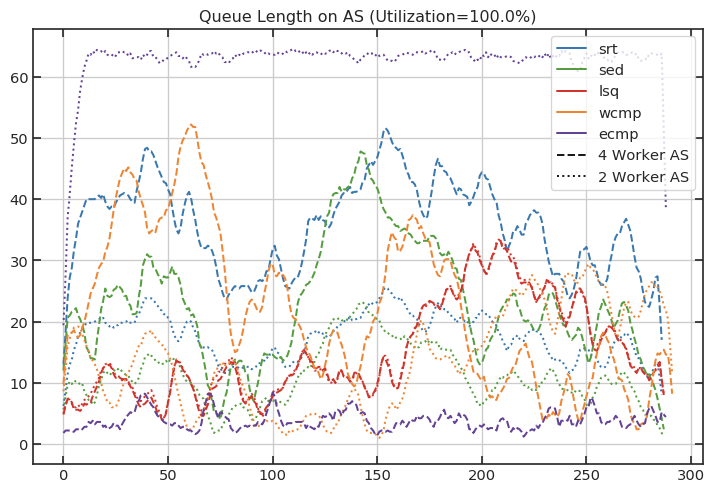

In [64]:
fig = plt.figure(figsize=(9, 6), dpi=96)
for i, method in enumerate(methods):
    plt.plot(smooth(result_grp1[method], 5), color=COLORS[i], linestyle='--')
    plt.plot(smooth(result_grp2[method], 5), color=COLORS[i], linestyle=':')
    plt.plot(0,0, color=COLORS[i], label=method)
plt.plot(0, 0, color='k', linestyle='--', label='4 Worker AS')
plt.plot(0, 0, color='k', linestyle=':', label='2 Worker AS')
plt.legend()
plt.title('Queue Length on AS (Utilization={:.1%})'.format(rate))
plt.show()

# Check RLB SAC performance

In [66]:
rates = [0.765, 0.845, 0.925, 1.]
methods = ["srt", "sed","lsq","wcmp","ecmp", "rlb-sac"]
ratio_lo, ratio_hi = 0.05, 0.95

tss = {}
result = {}

for rate in rates:
    tss[rate] = {}
    result[rate] = {}
    for method in methods:
#         print("parse rate {} method {}".format(rate, method))
        if 'rlb' in method:
            ts_line_offset = 10
        else:
            ts_line_offset = 6
        dirname = os.path.join("../data/simulation", "same-trace-100ms-dev-reset","1lb-2as-1worker-1stage-same-0.10cpumu", method, "rate{:.3f}".format(rate), "")
        filename = os.path.join(dirname, 'test.log')
        
        all_lines = [l for l in read_file(filename)]
        fair_list = []
        ts_list = []
        # episode end at these lines
        end_idx = [i for i, l in enumerate(all_lines) if '--------------------' in l]
        # periodic check at these lines
        lines_idx = [i for i, l in enumerate(all_lines) if 'Periodic' in l]
        lines = [l for l in all_lines if 'Periodic' in l]
        for i, l in enumerate(lines):
            if not 'Sim. Time:' in all_lines[lines_idx[i]-ts_line_offset]: continue
            t_rest_list = [float(s.split(' ')[-1]) for s in l.split('|')]
            fair_list.append(calcul_fair(t_rest_list))
            ts_list.append(float(all_lines[lines_idx[i]-ts_line_offset].split(':')[-1].rstrip('s')))

        # shift episode timeline
        t_end_last_episodes = [0]
        ts_list_shift = [ts_list[0]]
        for i, (ts_now, ts_last) in enumerate(zip(ts_list[1:], ts_list[:-1])):
            if ts_now < ts_last: 
                t_end_last_episodes.append(ts_last+t_end_last_episodes[-1])
#                 print("new episode! t_end_last_episode={:.3f}s".format(t_end_last_episodes[-1]))
            ts_list_shift.append(ts_now+t_end_last_episodes[-1])
        assert len(ts_list_shift) == len(fair_list)
        tss[rate][method] = ts_list_shift
        result[rate][method] = fair_list

In [67]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [68]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

rate=0.765 | method=srt | Fairness Index 0.913
rate=0.765 | method=sed | Fairness Index 0.874
rate=0.765 | method=lsq | Fairness Index 0.788
rate=0.765 | method=wcmp | Fairness Index 0.769
rate=0.765 | method=ecmp | Fairness Index 0.518
rate=0.765 | method=rlb-sac | Fairness Index 0.812


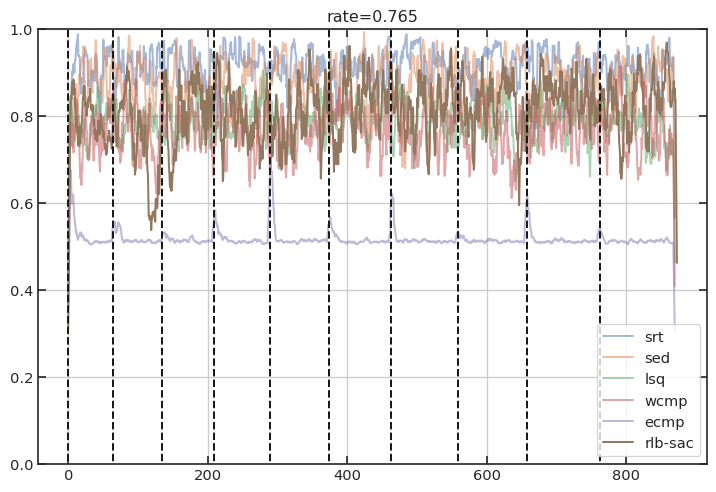

rate=0.845 | method=srt | Fairness Index 0.939
rate=0.845 | method=sed | Fairness Index 0.907
rate=0.845 | method=lsq | Fairness Index 0.795
rate=0.845 | method=wcmp | Fairness Index 0.782
rate=0.845 | method=ecmp | Fairness Index 0.518
rate=0.845 | method=rlb-sac | Fairness Index 0.862


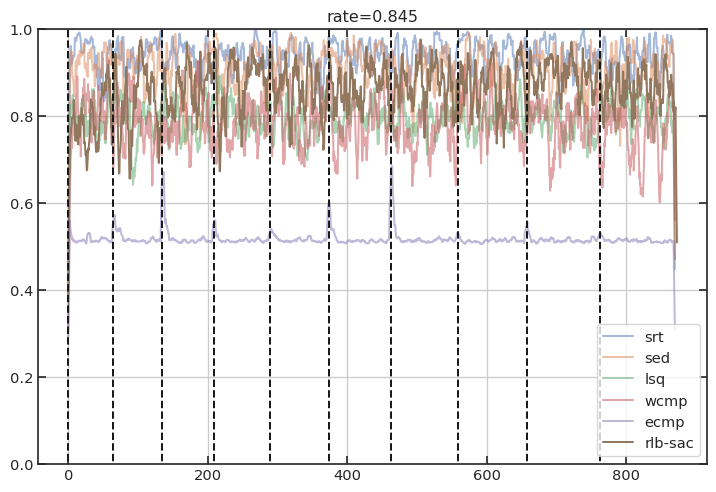

rate=0.925 | method=srt | Fairness Index 0.971
rate=0.925 | method=sed | Fairness Index 0.951
rate=0.925 | method=lsq | Fairness Index 0.809
rate=0.925 | method=wcmp | Fairness Index 0.785
rate=0.925 | method=ecmp | Fairness Index 0.519
rate=0.925 | method=rlb-sac | Fairness Index 0.902


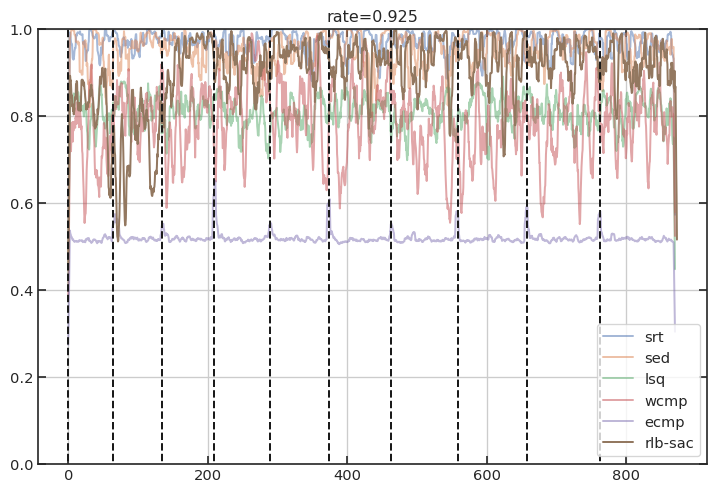

rate=1.000 | method=srt | Fairness Index 0.997
rate=1.000 | method=sed | Fairness Index 0.988
rate=1.000 | method=lsq | Fairness Index 0.862
rate=1.000 | method=wcmp | Fairness Index 0.823
rate=1.000 | method=ecmp | Fairness Index 0.520
rate=1.000 | method=rlb-sac | Fairness Index 0.939


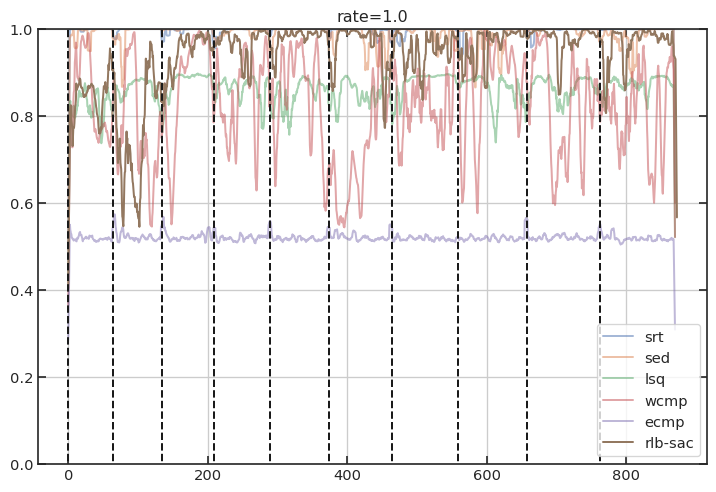

In [69]:
for rate, tuples in result.items():
    fig = plt.figure(figsize=(9, 6), dpi=96)
    for method, values in tuples.items():
        if 'rlb' in method:
            alpha = 1.
        else:
            alpha = 0.5
        plt.plot(tss[rate][method], smooth(values, 10), label=method, alpha=alpha)
        print('rate={:.3f} | method={} | Fairness Index {:.3f}'.format(rate, method, np.mean(values)))
    for t_end in t_end_last_episodes:
        plt.plot([t_end]*30, np.arange(-1, 2, 0.1), '--', color='k')
    plt.legend()
    plt.title('rate={}'.format(rate))
    plt.ylim(0, 1.)
    plt.show()

## Plot reward

In [ ]:
rates = [0.765, 0.845, 0.925, 1.]
method = "rlb-sac"
ratio_lo, ratio_hi = 0.05, 0.95

tss = {}
result = {}

for rate in rates:
    tss[rate] = {}
    result[rate] = {}
    for method in methods:
#         print("parse rate {} method {}".format(rate, method))
        if 'rlb' in method:
            ts_line_offset = 10
        else:
            ts_line_offset = 6
        dirname = os.path.join("../data/simulation", "same-trace-100ms-dev-reset","1lb-2as-1worker-1stage-same-0.10cpumu", method, "rate{:.3f}".format(rate), "")
        filename = os.path.join(dirname, 'test.log')
        
        all_lines = [l for l in read_file(filename)]
        fair_list = []
        ts_list = []
        # periodic check at these lines
        lines_idx = [i for i, l in enumerate(all_lines) if 'Periodic' in l]
        lines = [l for l in all_lines if 'Periodic' in l]
        for i, l in enumerate(lines):
            if not 'Sim. Time:' in all_lines[lines_idx[i]-ts_line_offset]: continue
            t_rest_list = [float(s.split(' ')[-1]) for s in l.split('|')]
            fair_list.append(calcul_fair(t_rest_list))
            ts_list.append(float(all_lines[lines_idx[i]-ts_line_offset].split(':')[-1].rstrip('s')))

        # shift episode timeline
        t_end_last_episodes = [0]
        ts_list_shift = [ts_list[0]]
        for i, (ts_now, ts_last) in enumerate(zip(ts_list[1:], ts_list[:-1])):
            if ts_now < ts_last: 
                t_end_last_episodes.append(ts_last+t_end_last_episodes[-1])
#                 print("new episode! t_end_last_episode={:.3f}s".format(t_end_last_episodes[-1]))
            ts_list_shift.append(ts_now+t_end_last_episodes[-1])
        assert len(ts_list_shift) == len(fair_list)
        tss[rate][method] = ts_list_shift
        result[rate][method] = fair_list

In [60]:
len(end_idx)

10

In [63]:
rates = [0.765, 0.845, 0.925, 1.]
method = "rlb-sac"
ratio_lo, ratio_hi = 0.05, 0.95
ts_line_offset = 10

result = {}

for rate in rates:
    result[rate] = {}
    dirname = os.path.join("../data/simulation", "same-trace-100ms-dev-reset","1lb-2as-1worker-1stage-same-0.10cpumu", method, "rate{:.3f}".format(rate), "")
    filename = os.path.join(dirname, 'test.log')

    all_lines = [l for l in read_file(filename)]
    start_idx = [i for i, l in enumerate(all_lines) if 'summarize()' in l][::2]
    end_idx = [i for i, l in enumerate(all_lines) if '--------------------' in l]
    assert len(start_idx) == len(end_idx)
    n_ep = len(start_idx)
    reward_list = []
    for ep in range(10):
        lines = [l for l in all_lines[int(ratio_lo*start_idx[ep]):int(ratio_hi*end_idx[ep])] if 'Latest Reward' in l]
        for l in lines:
            reward_list.append(float(l.split(' ')[-1]))

    result[rate] = reward_list

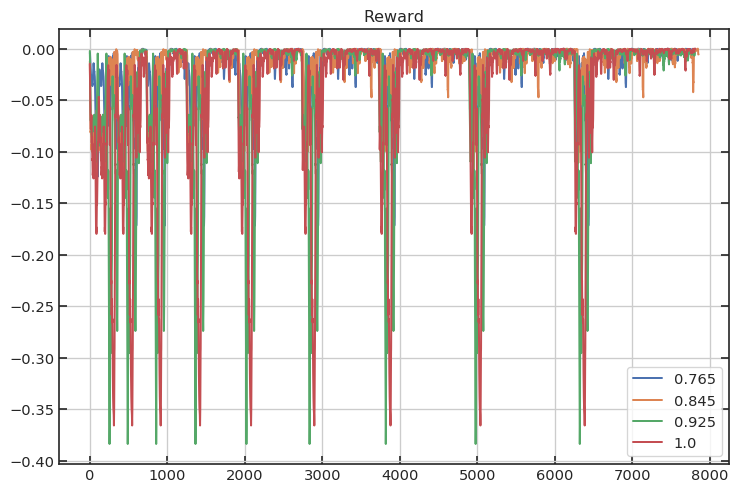

In [64]:
fig = plt.figure(figsize=(9, 6), dpi=96)
for rate, values in result.items():
    plt.plot(smooth(values, 10), label=rate)
plt.legend()
plt.title('Reward'.format(rate))
plt.show()

# Check RLB SAC performance

In [83]:
rates = [0.765, 0.845, 0.925, 1.]
methods = ["srt", "sed","lsq","wcmp","ecmp", "rlb-sac"]
ratio_lo, ratio_hi = 0.05, 0.95

tss = {}
result = {}

for rate in rates:
    tss[rate] = {}
    result[rate] = {}
    for method in methods:
#         print("parse rate {} method {}".format(rate, method))
        if 'rlb' in method:
            ts_line_offset = 10
        else:
            ts_line_offset = 6
        dirname = os.path.join("../data/simulation", "exp-trace-100ms-dev-reset","1lb-2as-1worker-1stage-same-0.10cpumu", method, "rate{:.3f}".format(rate), "")
        filename = os.path.join(dirname, 'test.log')
        
        all_lines = [l for l in read_file(filename)]
        fair_list = []
        ts_list = []
        # episode end at these lines
        end_idx = [i for i, l in enumerate(all_lines) if '--------------------' in l]
        # periodic check at these lines
        lines_idx = [i for i, l in enumerate(all_lines) if 'Periodic' in l]
        lines = [l for l in all_lines if 'Periodic' in l]
        for i, l in enumerate(lines):
            if not 'Sim. Time:' in all_lines[lines_idx[i]-ts_line_offset]: continue
            t_rest_list = [float(s.split(' ')[-1]) for s in l.split('|')]
            fair_list.append(calcul_fair(t_rest_list))
            ts_list.append(float(all_lines[lines_idx[i]-ts_line_offset].split(':')[-1].rstrip('s')))

        # shift episode timeline
        t_end_last_episodes = [0]
        ts_list_shift = [ts_list[0]]
        for i, (ts_now, ts_last) in enumerate(zip(ts_list[1:], ts_list[:-1])):
            if ts_now < ts_last: 
                t_end_last_episodes.append(ts_last+t_end_last_episodes[-1])
#                 print("new episode! t_end_last_episode={:.3f}s".format(t_end_last_episodes[-1]))
            ts_list_shift.append(ts_now+t_end_last_episodes[-1])
        assert len(ts_list_shift) == len(fair_list)
        tss[rate][method] = ts_list_shift
        result[rate][method] = fair_list

In [84]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

rate=0.765 | method=srt | Fairness Index 0.912
rate=0.765 | method=sed | Fairness Index 0.816
rate=0.765 | method=lsq | Fairness Index 0.804
rate=0.765 | method=wcmp | Fairness Index 0.744
rate=0.765 | method=ecmp | Fairness Index 0.529
rate=0.765 | method=rlb-sac | Fairness Index 0.783


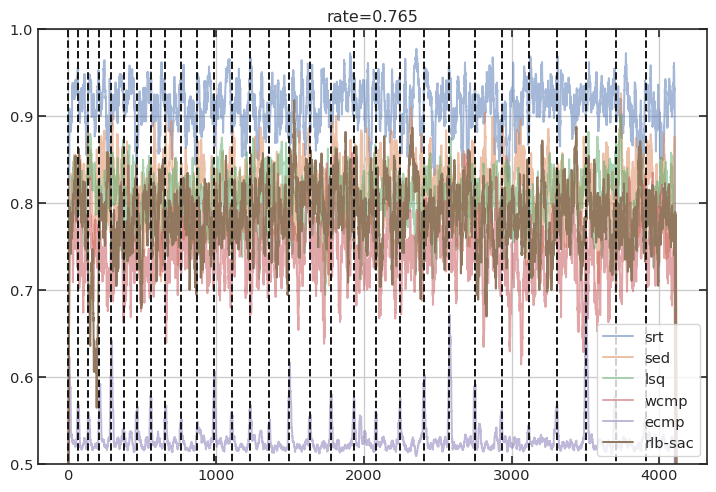

rate=0.845 | method=srt | Fairness Index 0.936
rate=0.845 | method=sed | Fairness Index 0.853
rate=0.845 | method=lsq | Fairness Index 0.824
rate=0.845 | method=wcmp | Fairness Index 0.754
rate=0.845 | method=ecmp | Fairness Index 0.532
rate=0.845 | method=rlb-sac | Fairness Index 0.821


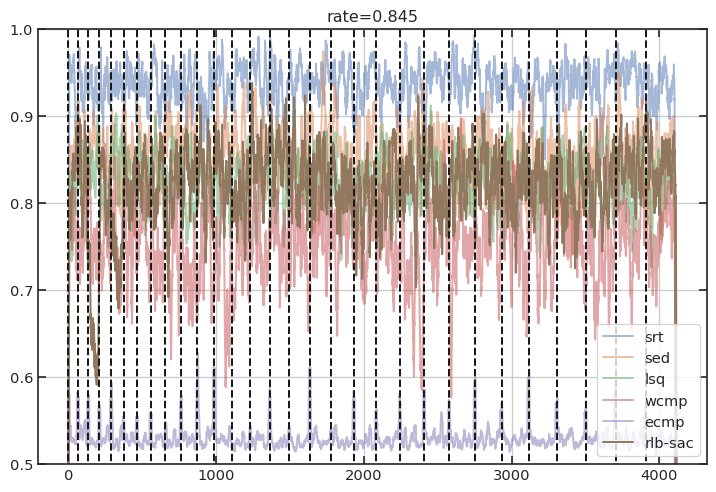

rate=0.925 | method=srt | Fairness Index 0.966
rate=0.925 | method=sed | Fairness Index 0.893
rate=0.925 | method=lsq | Fairness Index 0.844
rate=0.925 | method=wcmp | Fairness Index 0.770
rate=0.925 | method=ecmp | Fairness Index 0.533
rate=0.925 | method=rlb-sac | Fairness Index 0.875


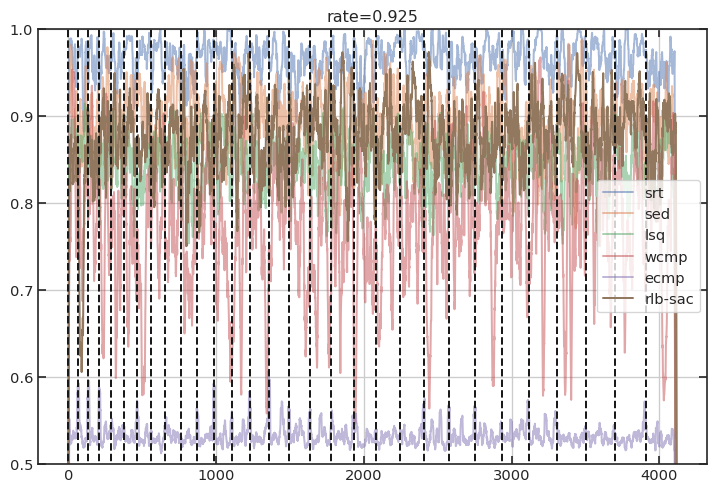

rate=1.000 | method=srt | Fairness Index 0.992
rate=1.000 | method=sed | Fairness Index 0.957
rate=1.000 | method=lsq | Fairness Index 0.880
rate=1.000 | method=wcmp | Fairness Index 0.805
rate=1.000 | method=ecmp | Fairness Index 0.538
rate=1.000 | method=rlb-sac | Fairness Index 0.935


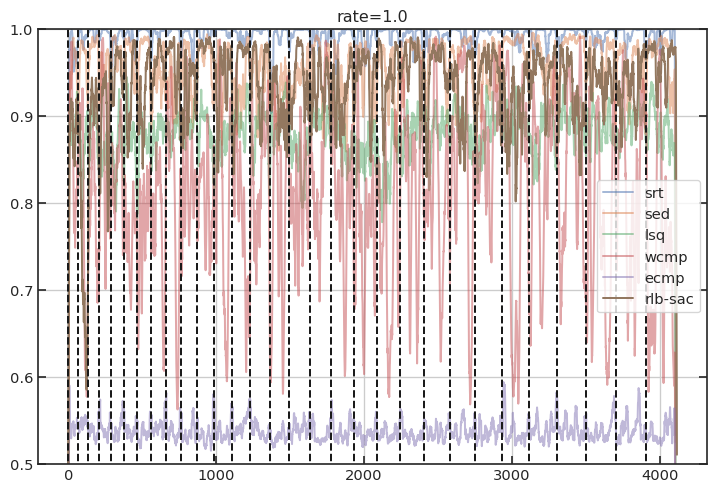

In [85]:
for rate, tuples in result.items():
    fig = plt.figure(figsize=(9, 6), dpi=96)
    for method, values in tuples.items():
        if 'rlb' in method:
            alpha = 1.
        else:
            alpha = 0.5
        plt.plot(tss[rate][method], smooth(values, 30), label=method, alpha=alpha)
        print('rate={:.3f} | method={} | Fairness Index {:.3f}'.format(rate, method, np.mean(values)))
    for t_end in t_end_last_episodes:
        plt.plot([t_end]*30, np.arange(-1, 2, 0.1), '--', color='k')
    plt.legend()
    plt.title('rate={}'.format(rate))
    plt.ylim(0.5, 1.)
    plt.show()

## Plot reward

In [86]:
rates = [0.765, 0.845, 0.925, 1.]
method = "rlb-sac"
ratio_lo, ratio_hi = 0.05, 0.95

tss = {}
result = {}

for rate in rates:
    tss[rate] = {}
    result[rate] = {}
    for method in methods:
#         print("parse rate {} method {}".format(rate, method))
        if 'rlb' in method:
            ts_line_offset = 10
        else:
            ts_line_offset = 6
        dirname = os.path.join("../data/simulation", "same-trace-100ms-dev-reset","1lb-2as-1worker-1stage-same-0.10cpumu", method, "rate{:.3f}".format(rate), "")
        filename = os.path.join(dirname, 'test.log')
        
        all_lines = [l for l in read_file(filename)]
        fair_list = []
        ts_list = []
        # periodic check at these lines
        lines_idx = [i for i, l in enumerate(all_lines) if 'Periodic' in l]
        lines = [l for l in all_lines if 'Periodic' in l]
        for i, l in enumerate(lines):
            if not 'Sim. Time:' in all_lines[lines_idx[i]-ts_line_offset]: continue
            t_rest_list = [float(s.split(' ')[-1]) for s in l.split('|')]
            fair_list.append(calcul_fair(t_rest_list))
            ts_list.append(float(all_lines[lines_idx[i]-ts_line_offset].split(':')[-1].rstrip('s')))

        # shift episode timeline
        t_end_last_episodes = [0]
        ts_list_shift = [ts_list[0]]
        for i, (ts_now, ts_last) in enumerate(zip(ts_list[1:], ts_list[:-1])):
            if ts_now < ts_last: 
                t_end_last_episodes.append(ts_last+t_end_last_episodes[-1])
#                 print("new episode! t_end_last_episode={:.3f}s".format(t_end_last_episodes[-1]))
            ts_list_shift.append(ts_now+t_end_last_episodes[-1])
        assert len(ts_list_shift) == len(fair_list)
        tss[rate][method] = ts_list_shift
        result[rate][method] = fair_list

In [87]:
len(end_idx)

30

In [88]:
rates = [0.765, 0.845, 0.925, 1.]
method = "rlb-sac"
ratio_lo, ratio_hi = 0.05, 0.95
ts_line_offset = 10

result = {}

for rate in rates:
    result[rate] = {}
    dirname = os.path.join("../data/simulation", "exp-trace-100ms-dev-reset","1lb-2as-1worker-1stage-same-0.10cpumu", method, "rate{:.3f}".format(rate), "")
    filename = os.path.join(dirname, 'test.log')

    all_lines = [l for l in read_file(filename)]
    start_idx = [i for i, l in enumerate(all_lines) if 'summarize()' in l][::2]
    end_idx = [i for i, l in enumerate(all_lines) if '--------------------' in l]
    assert len(start_idx) == len(end_idx)
    n_ep = len(start_idx)
    reward_list = []
    for ep in range(30):
        lines = [l for l in all_lines[int(ratio_lo*start_idx[ep]):int(ratio_hi*end_idx[ep])] if 'Latest Reward' in l]
        for l in lines:
            reward_list.append(float(l.split(' ')[-1]))

    result[rate] = reward_list

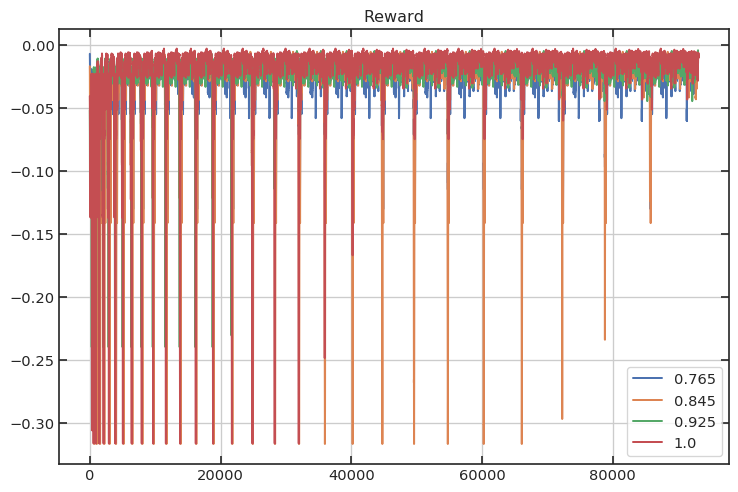

In [90]:
fig = plt.figure(figsize=(9, 6), dpi=96)
for rate, values in result.items():
    plt.plot(smooth(values, 50), label=rate)
plt.legend()
plt.title('Reward'.format(rate))
plt.show()